In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt

In [38]:
dataset = pd.read_csv('C:/Cygnss/report/ML/data_all_months_9km.csv')

In [39]:
dataset.tail()

,index,day_num,lat,lon,preff,inc_angle,elevation,clay,sand,silt,depres,ndvi,pow_mean,pow_var,pow_skew,pow_kurt,txson_gt
4316,457,365,30.349415,-98.764160,149.037529,30.624893,619.839355,50.0,22.1,27.9,30.0,5333,-604.114441,5676070.5,-3.689563,11.611123,0.142848
4317,458,365,30.360422,-98.735016,148.971417,30.616779,583.885864,39.0,30.8,30.2,43.0,5532,-604.114441,5676070.5,-3.689563,11.611123,0.142848
4318,459,365,30.371424,-98.705872,149.389222,30.608690,534.385376,44.0,7.4,48.6,48.0,4953,-604.114441,5676070.5,-3.689563,11.611123,0.142848
4319,460,365,30.382427,-98.676727,148.629903,30.600616,494.846802,34.0,18.1,47.9,201.0,4577,-604.114441,5676070.5,-3.689563,11.611123,0.158614
4320,461,365,30.393412,-98.647552,148.560646,30.592594,488.117249,50.0,22.1,27.9,30.0,5315,-604.114441,5676070.5,-3.689563,11.611123,0.158614


In [40]:
data = dataset.iloc[:,4:]

In [41]:
y = data['txson_gt']
X = data.iloc[:,:-1]

In [42]:
def train_ann(variables):
    X_sel = data[variables]
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
    scalar = StandardScaler()
    scalar.fit(X_train)
    
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    X_sel = scalar.transform(X_sel)

    param_grid = {
        'hidden_layer_sizes': [(10,10), (10,100), (100,10), (100,100), 
                               (10, 10,10), (10, 10,100), (10, 100,10), (10, 100,100),
                               (100,10,10), (100,10,100), (100,100,10), (100,100,100)
                              ]
    }

    grid = GridSearchCV(MLPRegressor(random_state=1, max_iter=1000), param_grid = param_grid,
                      scoring = 'neg_mean_squared_error')
    
    regr = grid.fit(X_train, y_train)
#     y_pred = cross_val_predict(grid, X_train, y_train)
    
    pred_train = regr.predict(X_train)
    pred_test = regr.predict(X_test)
    pred_all = regr.predict(X_sel)
    
    print(grid.best_params_)
    print(np.round(pearsonr(pred_train, y_train),4))
    print(np.round(pearsonr(pred_test, y_test),4))
       
    print('Test RMSE: {}'.format(np.round(sqrt(mean_squared_error(y_test, pred_test)), 4)))

    return grid, X_sel, pred_all

{'hidden_layer_sizes': (100, 10, 100)}
[0.617 0.   ]
[0.5903 0.    ]
Test RMSE: 0.0476


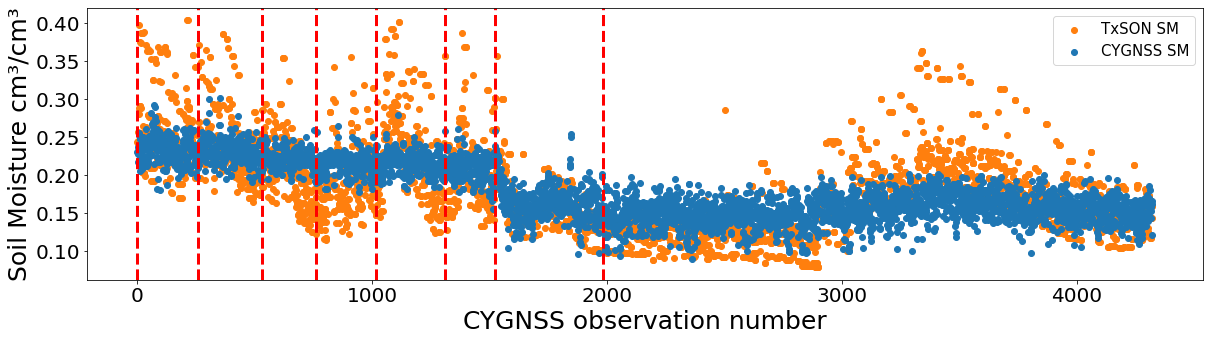

In [43]:
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'elevation', 'ndvi', 'depres']
regr, X, preds = train_ann(variables_sel)
fig, ax = plt.subplots(figsize = (20,5))
ax.scatter(data.index, y, c = 'tab:orange',label = 'TxSON SM')
ax.scatter(data.index, preds, label = 'CYGNSS SM')
ax.set_xlabel('CYGNSS observation number')
ax.set_ylabel('Soil Moisture cm\u00b3/cm\u00b3')
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(x=0, linestyle = '--', linewidth = 3, color = 'red')
plt.axvline(x=260, linestyle = '--', linewidth = 3, color = 'red')
plt.axvline(x=529, linestyle = '--', linewidth = 3, color = 'red')
plt.axvline(x=760, linestyle = '--', linewidth = 3, color = 'red')
plt.axvline(x=1016, linestyle = '--', linewidth = 3, color = 'red')
plt.axvline(x=1311, linestyle = '--', linewidth = 3, color = 'red')
plt.axvline(x=1523, linestyle = '--', linewidth = 3, color = 'red')
plt.axvline(x=1983, linestyle = '--', linewidth = 3, color = 'red')
# plt.xticks(np.arange(min(data.index), max(data.index), 20))
# plt.xticks(np.array([0,260,516]))
ax.legend(prop = {'size':15})
# plt.savefig('C:/Cygnss/report/figures/res_9km_big.jpg')
plt.show()



In [33]:
dataset['cygnss_sm'] = preds
dataset.to_csv('report/ML/cygnss_sm_all_months.csv')